In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
import requests

In [3]:
url = 'http://favt.gov.ru/opendata/7714549744-statpassga/data-20210201-structure-20151111.csv'

In [4]:
headers = {'content-type': 'application/json'}

In [5]:
req = requests.get(url, stream=True, headers=headers)

In [6]:
req

<Response [403]>

In [7]:
req.content

b'<HTML>\r\n<HEAD>\r\n<SCRIPT>\r\nwindow.location.href = "/sp-error/?_event_transid=2021-08-25-13-37-38-226C097509F70706";\r\n</SCRIPT>\r\n</HEAD>\r\n<BODY>\r\n<h1>Forbidden</h1><pre>Request ID: 2021-08-25-13-37-38-226C097509F70706</pre>\r\n</BODY>\r\n</HTML>'

## Задание 1

### Пытался выгружать напрямую, не получилось, скачал и открыл файл вручную

In [3]:
file = pd.read_csv('data-20210201-structure-20151111.csv', encoding='cp1251', delimiter=';')
file.head(2)

,Год,Период,МВЛ,ДЗ,СНГ,Внутренние,Местные,Итого
0,2001,1,654 917,577 183,77 734,819 249,84 625,1 474 166
1,2001,2,515 030,437 017,78 013,839 389,92 893,1 354 419


In [4]:
file['Дата'] = file['Год'].astype(str) + '/' + file['Период'].astype(str)

In [5]:
file.head(2)

,Год,Период,МВЛ,ДЗ,СНГ,Внутренние,Местные,Итого,Дата
0,2001,1,654 917,577 183,77 734,819 249,84 625,1 474 166,2001/1
1,2001,2,515 030,437 017,78 013,839 389,92 893,1 354 419,2001/2


In [6]:
file['Дата'] = pd.to_datetime(file['Дата'])

In [7]:
file.head(2)

,Год,Период,МВЛ,ДЗ,СНГ,Внутренние,Местные,Итого,Дата
0,2001,1,654 917,577 183,77 734,819 249,84 625,1 474 166,2001-01-01
1,2001,2,515 030,437 017,78 013,839 389,92 893,1 354 419,2001-02-01


In [8]:
str_cols = file.select_dtypes(include='object').columns
str_cols

Index(['МВЛ', 'ДЗ', 'СНГ', 'Внутренние', 'Местные', 'Итого'], dtype='object')

In [9]:
for i in str_cols:
    file[i] = file[i].str.replace(" ","")

In [10]:
file[file.select_dtypes(include='object').columns] = file.select_dtypes(include='object').astype(int)

In [11]:
df = file.loc[(file['Год']>=2015) & (file['Год']<=2019)]

In [12]:
df.head(2)

,Год,Период,МВЛ,ДЗ,СНГ,Внутренние,Местные,Итого,Дата
168,2015,1,2719771,2139659,580112,3160127,96564,5879898,2015-01-01
169,2015,2,2151636,1629675,521961,2961237,95808,5112873,2015-02-01


In [13]:
df['Год'].value_counts()

2015    12
2016    12
2017    12
2018    12
2019    12
Name: Год, dtype: int64

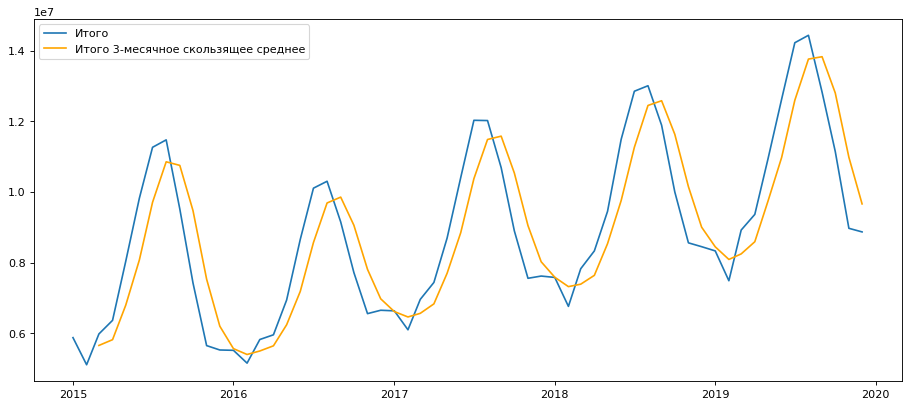

In [14]:
figure(figsize=(14, 6), dpi=80)

### среднее скользящее за 3 месяца
rolling_mean = df["Итого"].rolling(3).mean()

plt.plot(df['Дата'], df['Итого'], label='Итого')
plt.plot(df['Дата'], rolling_mean, label='Итого 3-месячное скользящее среднее', color='orange')

plt.legend(loc='upper left')
plt.show()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
file

,Год,Период,МВЛ,ДЗ,СНГ,Внутренние,Местные,Итого,Дата
0,2001,1,654917,577183,77734,819249,84625,1474166,2001-01-01
1,2001,2,515030,437017,78013,839389,92893,1354419,2001-02-01
2,2001,3,614777,523261,91516,950690,99640,1565467,2001-03-01
3,2001,4,674167,569724,104443,1065775,117911,1739942,2001-04-01
4,2001,5,821865,721100,100765,1126313,123818,1948178,2001-05-01
...,...,...,...,...,...,...,...,...,...
235,2020,8,754707,736772,17935,8566738,208991,9321445,2020-08-01
236,2020,9,1299365,1248907,50458,7465960,197679,8765325,2020-09-01
237,2020,10,1192006,1124555,67451,5605811,160717,6797817,2020-10-01
238,2020,11,526405,454304,72101,4144768,143690,4671173,2020-11-01


In [17]:
df

,Год,Период,МВЛ,ДЗ,СНГ,Внутренние,Местные,Итого,Дата
168,2015,1,2719771,2139659,580112,3160127,96564,5879898,2015-01-01
169,2015,2,2151636,1629675,521961,2961237,95808,5112873,2015-02-01
170,2015,3,2551966,1979626,572340,3432363,123620,5984329,2015-03-01
171,2015,4,2712819,2118717,594102,3655388,147271,6368207,2015-04-01
172,2015,5,3708747,3061589,647158,4329492,155794,8038239,2015-05-01
173,2015,6,4448712,3797554,651158,5373407,176953,9822119,2015-06-01
174,2015,7,4963931,4244213,719718,6299025,197055,11262956,2015-07-01
175,2015,8,4982062,4221740,760322,6490955,199196,11473017,2015-08-01
176,2015,9,4058208,3404979,653229,5460195,167792,9518403,2015-09-01
177,2015,10,3142966,2565803,577163,4282883,158846,7425849,2015-10-01


In [23]:
### 3-мес скользящее среднее
file['mean_3m'] = file["Итого"].rolling(3).mean()

In [24]:
len(file.loc[(file['Дата']>='2019') & (file['Дата']<'2020')]["mean_3m"])

12

### Разедлим графики 2015-2018 и 2019 года 

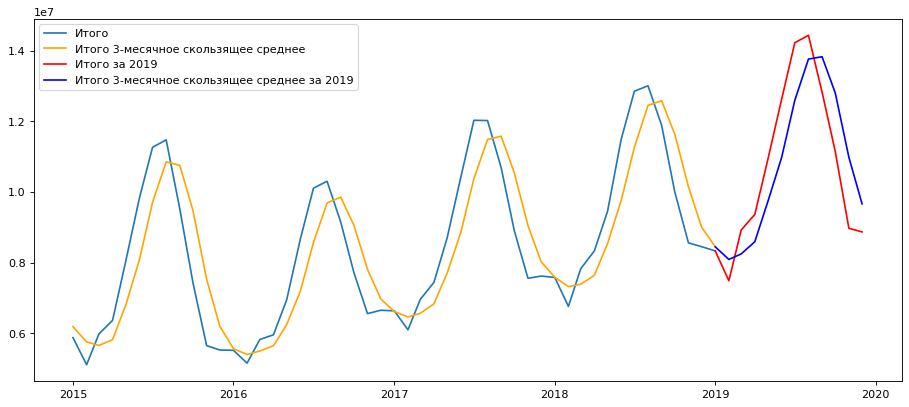

In [25]:
figure(figsize=(14, 6), dpi=80)


#2015-2018
rolling_mean = file.loc[(file['Дата']>='2015') & (file['Дата']<='2019')]["mean_3m"]

plt.plot(df.loc[df['Дата']<='2019']['Дата'], df.loc[df['Дата']<='2019']['Итого'], label='Итого')
plt.plot(df.loc[df['Дата']<='2019']['Дата'], rolling_mean, 
         label='Итого 3-месячное скользящее среднее', 
         color='orange')
#2019
rolling_mean_2019 = file.loc[(file['Дата']>='2019') & (file['Дата']<'2020')]["mean_3m"]

plt.plot(df.loc[df['Дата']>='2019']['Дата'], df.loc[df['Дата']>='2019']['Итого'], label='Итого за 2019',
         color='red')
plt.plot(file.loc[(file['Дата']>='2019') & (file['Дата']<'2020')]['Дата'], rolling_mean_2019, 
         label='Итого 3-месячное скользящее среднее за 2019', 
         color='blue')

#plt.plot(df.ds, rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

In [26]:
file.loc[(file['Год']>=2015) & (file['Год']<=2019)]

,Год,Период,МВЛ,ДЗ,СНГ,Внутренние,Местные,Итого,Дата,mean_3m
168,2015,1,2719771,2139659,580112,3160127,96564,5879898,2015-01-01,6.190973e+06
169,2015,2,2151636,1629675,521961,2961237,95808,5112873,2015-02-01,5.757536e+06
170,2015,3,2551966,1979626,572340,3432363,123620,5984329,2015-03-01,5.659033e+06
171,2015,4,2712819,2118717,594102,3655388,147271,6368207,2015-04-01,5.821803e+06
172,2015,5,3708747,3061589,647158,4329492,155794,8038239,2015-05-01,6.796925e+06
173,2015,6,4448712,3797554,651158,5373407,176953,9822119,2015-06-01,8.076188e+06
174,2015,7,4963931,4244213,719718,6299025,197055,11262956,2015-07-01,9.707771e+06
175,2015,8,4982062,4221740,760322,6490955,199196,11473017,2015-08-01,1.085270e+07
176,2015,9,4058208,3404979,653229,5460195,167792,9518403,2015-09-01,1.075146e+07
177,2015,10,3142966,2565803,577163,4282883,158846,7425849,2015-10-01,9.472423e+06


In [27]:
fit_sarima=ARIMA(file.loc[(file['Год']>=2015) & (file['Год']<=2018)]['mean_3m'].values,
                 order=(1, 1, 0),
                 seasonal_order=(1,2,0,12),
                 dates=file.loc[(file['Год']>=2015) & (file['Год']<=2018)]['Дата']
                              ).fit()

/Users/a18879409/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Users/a18879409/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


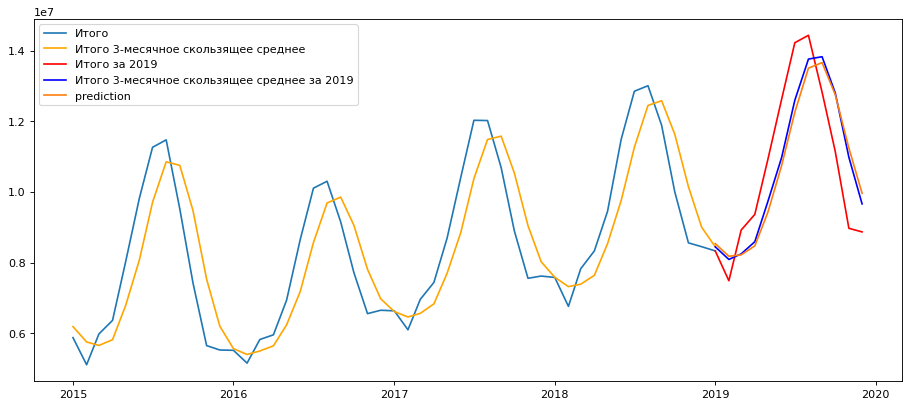

In [28]:
figure(figsize=(14, 6), dpi=80)


#данные за 2015-2018
rolling_mean = file.loc[(file['Дата']>='2015') & (file['Дата']<='2019')]["mean_3m"]

plt.plot(df.loc[df['Дата']<='2019']['Дата'], df.loc[df['Дата']<='2019']['Итого'], label='Итого')
plt.plot(df.loc[df['Дата']<='2019']['Дата'], rolling_mean, 
         label='Итого 3-месячное скользящее среднее', 
         color='orange')
#данные за 2019
rolling_mean_2019 = file.loc[(file['Дата']>='2019') & (file['Дата']<'2020')]["mean_3m"]

plt.plot(df.loc[df['Дата']>='2019']['Дата'], df.loc[df['Дата']>='2019']['Итого'], label='Итого за 2019',
         color='red')
plt.plot(file.loc[(file['Дата']>='2019') & (file['Дата']<'2020')]['Дата'], rolling_mean_2019, 
         label='Итого 3-месячное скользящее среднее за 2019', 
         color='blue')

#plt.plot(file.loc[(file['Год']==2019)]['Дата'], file.loc[(file['Год']==2019)]['mean_3m'], label='true', color='purple')

#предсказание временного ряда
plt.plot(df.loc[df['Год']>=2019]['Дата'], fit_sarima.forecast(steps=12), label='prediction', )

plt.legend(loc='upper left')
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [30]:
target = rolling_mean_2019.values

In [31]:
predict = fit_sarima.forecast(steps=12)

In [32]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error 

In [33]:
rmse = sqrt(mean_squared_error(target, predict))
rmse

212759.06706923823

In [34]:
score = mean_absolute_percentage_error(target, predict)
score

0.017240457228115826

## Задание 2

In [35]:
df = pd.read_excel('sample.xlsx')

In [36]:
df

,id,def_year,data_year,class,def,X1,X2,X3,X4,X5,...,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
0,7099152057,0,2019,1,0,0.042707,0.055474,3.622877569,0.003530,0.527003784,...,0.042478,1.298074538,0.115887,0.10120602,-3.004870,0.022816971,-16.818141,1.544893932,1.355985249,22.41510277
1,2905486262,0,2019,1,0,0.707910,0.271912,0.410450789,0.008796,0.262616226,...,0.268073,1.190000711,0.184163,1.457792145,0.677002,0.030273371,0.864823,3.112264973,4.07409499,0.412608118
2,1709558193,0,2019,1,0,0.573604,0.089757,0.697690037,0.130357,0,...,0.041300,1.866089727,0.177110,0.999388768,0.355998,0.325731223,0.410924,1.654442295,4.376420743,0.743364009
3,2702408985,0,2019,2,0,0.100933,0.013752,8.907542579,0.043468,0,...,0.008595,3.309675835,0.271648,0.814258399,-0.044806,0.048347446,-0.381995,0.957115542,3.681234635,8.907542579
4,2874968203,0,2019,3,0,0.810743,0.686554,0.013895064,0.329668,0.259254397,...,0.516492,5.75630858,0.001957,0.501904762,0.555931,29.264,0.292241,37.832,30.4152381,0.233437083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13581,1644359048,2018,2016,1,1,0.786332,0.872837,0.271727173,0.123702,0,...,0.612457,32.18512111,0.006639,3.376518219,0.786332,0.578947368,1.000000,4.680161943,150.6315789,0.271727173
13582,453373221,2018,2017,1,1,0.039601,0.099961,24.25206098,0.000555,1.471948819,...,0.083454,0.388914479,2.091107,0.062821301,-1.618448,0.00057741,-14.990062,0.38190564,0.404950827,24.25206098
13583,8695321394,2019,2018,1,1,0.932880,-0.103767,0.070587743,0.391748,0,...,-0.164995,0.544665115,0.092866,5.502971192,0.918001,5.949107907,0.805497,12.43057476,8.114778452,0.0719494
13584,7645874353,2018,2017,1,1,0.033453,0.082428,27.85773975,0.000087,0.42005814,...,0.065821,1.045986116,0.890951,0.429542403,-0.998335,9.28E-05,-14.434341,0.519008949,1.082188479,28.89275766


In [37]:
df.dtypes

id             int64
def_year       int64
data_year      int64
class          int64
def            int64
X1           float64
X2           float64
X3            object
X4           float64
X5            object
X6            object
X7           float64
X8           float64
X9           float64
X10          float64
X11           object
X12          float64
X13           object
X14          float64
X15           object
X16          float64
X17           object
X18           object
X19           object
dtype: object

In [38]:
df.select_dtypes(include='object')

,X3,X5,X6,X11,X13,X15,X17,X18,X19
0,3.622877569,0.527003784,0.044612778,1.298074538,0.10120602,0.022816971,1.544893932,1.355985249,22.41510277
1,0.410450789,0.262616226,2.423607189,1.190000711,1.457792145,0.030273371,3.112264973,4.07409499,0.412608118
2,0.697690037,0,1.345235966,1.866089727,0.999388768,0.325731223,1.654442295,4.376420743,0.743364009
3,8.907542579,0,0.112264409,3.309675835,0.814258399,0.048347446,0.957115542,3.681234635,8.907542579
4,0.013895064,0.259254397,4.283809524,5.75630858,0.501904762,29.264,37.832,30.4152381,0.233437083
...,...,...,...,...,...,...,...,...,...
13581,0.271727173,0,3.680161943,32.18512111,3.376518219,0.578947368,4.680161943,150.6315789,0.271727173
13582,24.25206098,1.471948819,0.041233609,0.388914479,0.062821301,0.00057741,0.38190564,0.404950827,24.25206098
13583,0.070587743,0,13.8986565,0.544665115,5.502971192,5.949107907,12.43057476,8.114778452,0.0719494
13584,27.85773975,0.42005814,0.03461075,1.045986116,0.429542403,9.28E-05,0.519008949,1.082188479,28.89275766


In [39]:
pd.to_numeric(df['X3'])

TypeError: Invalid object type at position 414

In [40]:
df['X3'][414]

datetime.datetime(2021, 9, 16, 0, 0)

In [41]:
pd.to_numeric(df['X3'],errors='coerce')[414]

nan

In [42]:
for i in df.select_dtypes(include='object').columns:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [43]:
df.dtypes

id             int64
def_year       int64
data_year      int64
class          int64
def            int64
X1           float64
X2           float64
X3           float64
X4           float64
X5           float64
X6           float64
X7           float64
X8           float64
X9           float64
X10          float64
X11          float64
X12          float64
X13          float64
X14          float64
X15          float64
X16          float64
X17          float64
X18          float64
X19          float64
dtype: object

In [44]:
import seaborn as sns

In [45]:
df.columns

Index(['id', 'def_year', 'data_year', 'class', 'def', 'X1', 'X2', 'X3', 'X4',
       'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17', 'X18', 'X19'],
      dtype='object')

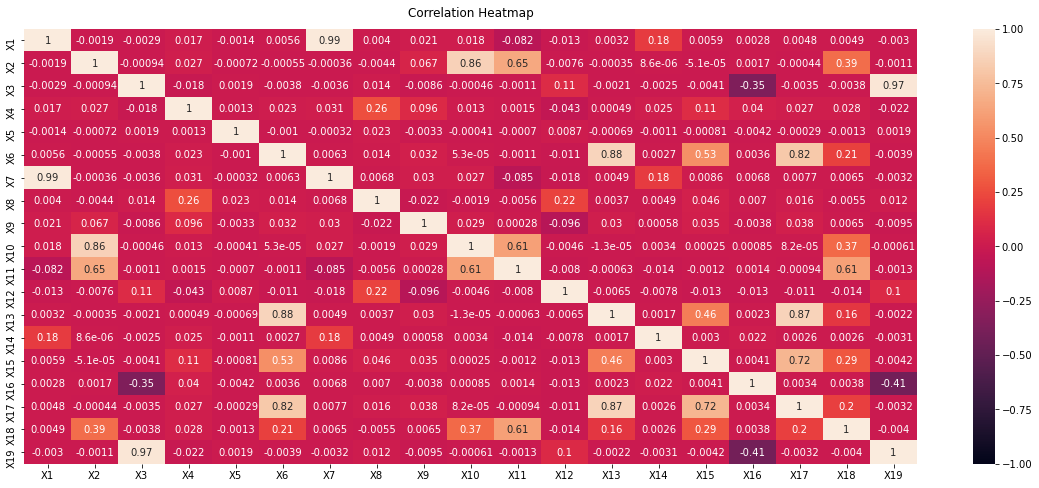

In [46]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(df[['X1', 'X2', 'X3', 'X4', 
                          'X5', 'X6', 'X7', 'X8',
                          'X9', 'X10', 'X11', 'X12',
                          'X13', 'X14', 'X15',
                          'X16', 'X17', 'X18', 'X19']].corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<ipython-input-47-a7a0b61a31bc>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'X16', 'X17', 'X18', 'X19']].corr(), dtype=np.bool))


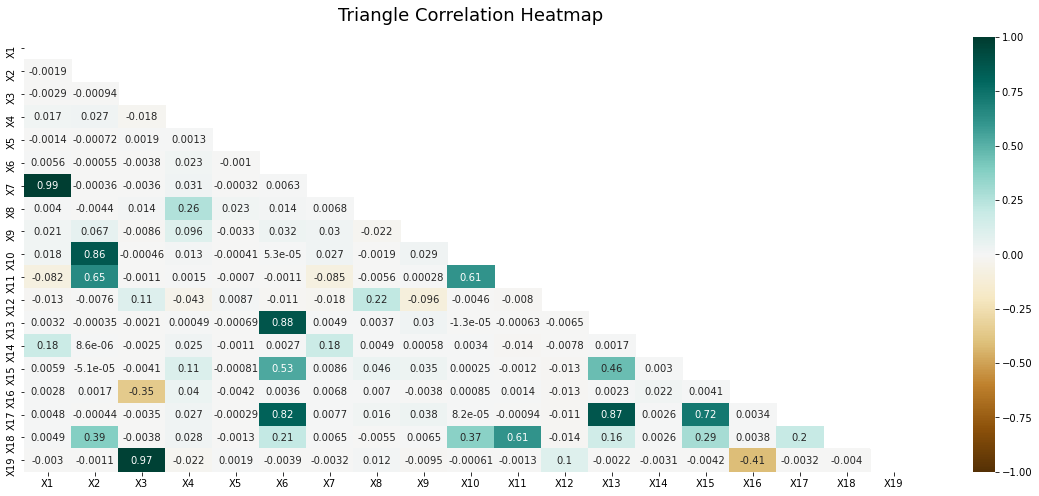

In [47]:
plt.figure(figsize=(20, 8))

mask = np.triu(np.ones_like(df[['X1', 'X2', 'X3', 'X4', 
                          'X5', 'X6', 'X7', 'X8',
                          'X9', 'X10', 'X11', 'X12',
                          'X13', 'X14', 'X15',
                          'X16', 'X17', 'X18', 'X19']].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[['X1', 'X2', 'X3', 'X4', 
                          'X5', 'X6', 'X7', 'X8',
                          'X9', 'X10', 'X11', 'X12',
                          'X13', 'X14', 'X15',
                          'X16', 'X17', 'X18', 'X19']].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

<ipython-input-48-310274df9987>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'X16', 'X17', 'X18', 'X19']].corr(), dtype=np.bool))


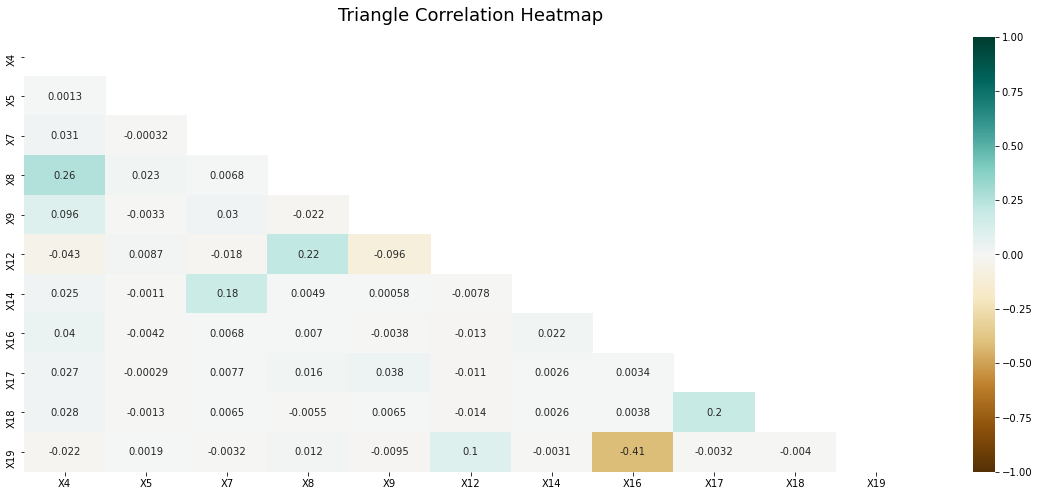

In [48]:
plt.figure(figsize=(20, 8))

mask = np.triu(np.ones_like(df[['X4', 'X5', 'X7', 'X8', 
                                'X9', 'X12', 'X14',
                                'X16', 'X17', 'X18', 'X19']].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[['X4', 'X5', 'X7', 'X8',
                          'X9', 'X12', 'X14',
                          'X16', 'X17' , 'X18', 'X19']].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [49]:
selected_feats = ['X4', 'X5', 'X7', 'X8', 'X9', 'X12', 'X14', 'X16', 'X17' , 'X18', 'X19']

In [50]:
df_res = df.dropna()[['X4', 'X5', 'X7', 'X8', 'X9', 'X12', 'X14', 'X16', 'X17' , 'X18', 'X19']]

In [51]:
df_res

,X4,X5,X7,X8,X9,X12,X14,X16,X17,X18,X19
0,0.003530,0.527004,0.084308,0.002720,0.042736,0.115887,-3.004870,-16.818141,1.544894,1.355985,22.415103
1,0.008796,0.262616,0.613745,0.007392,0.228497,0.184163,0.677002,0.864823,3.112265,4.074095,0.412608
2,0.130357,0.000000,0.261906,0.069856,0.048099,0.177110,0.355998,0.410924,1.654442,4.376421,0.743364
3,0.043468,0.000000,-0.038556,0.013133,0.004155,0.271648,-0.044806,-0.381995,0.957116,3.681235,8.907543
4,0.329668,0.259254,0.414924,0.057271,0.119270,0.001957,0.555931,0.292241,37.832000,30.415238,0.233437
...,...,...,...,...,...,...,...,...,...,...,...
13581,0.123702,0.000000,0.786332,0.003843,0.027119,0.006639,0.786332,1.000000,4.680162,150.631579,0.271727
13582,0.000555,1.471949,-0.593617,0.001426,0.257026,2.091107,-1.618448,-14.990062,0.381906,0.404951,24.252061
13583,0.391748,0.000000,0.752702,0.719246,-0.190515,0.092866,0.918001,0.805497,12.430575,8.114778,0.071949
13584,0.000087,0.420058,-0.448246,0.000083,0.078804,0.890951,-0.998335,-14.434341,0.519009,1.082188,28.892758


In [53]:
df['def_year'].unique()

array([   0, 2020, 2019, 2018, 2017, 2016])

In [54]:
df.loc[df['def']==0]['def_year'].unique()

array([0])

In [55]:
df.loc[df['def']==1]['def_year'].unique()

array([2020, 2019, 2018, 2017, 2016])

In [56]:
target = df.dropna()['def']

In [57]:
df_res.shape

(13472, 11)

In [58]:
df_res.dropna()

,X4,X5,X7,X8,X9,X12,X14,X16,X17,X18,X19
0,0.003530,0.527004,0.084308,0.002720,0.042736,0.115887,-3.004870,-16.818141,1.544894,1.355985,22.415103
1,0.008796,0.262616,0.613745,0.007392,0.228497,0.184163,0.677002,0.864823,3.112265,4.074095,0.412608
2,0.130357,0.000000,0.261906,0.069856,0.048099,0.177110,0.355998,0.410924,1.654442,4.376421,0.743364
3,0.043468,0.000000,-0.038556,0.013133,0.004155,0.271648,-0.044806,-0.381995,0.957116,3.681235,8.907543
4,0.329668,0.259254,0.414924,0.057271,0.119270,0.001957,0.555931,0.292241,37.832000,30.415238,0.233437
...,...,...,...,...,...,...,...,...,...,...,...
13581,0.123702,0.000000,0.786332,0.003843,0.027119,0.006639,0.786332,1.000000,4.680162,150.631579,0.271727
13582,0.000555,1.471949,-0.593617,0.001426,0.257026,2.091107,-1.618448,-14.990062,0.381906,0.404951,24.252061
13583,0.391748,0.000000,0.752702,0.719246,-0.190515,0.092866,0.918001,0.805497,12.430575,8.114778,0.071949
13584,0.000087,0.420058,-0.448246,0.000083,0.078804,0.890951,-0.998335,-14.434341,0.519009,1.082188,28.892758


In [59]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
test = sel.fit_transform(df_res)

In [60]:
sel.get_support()

array([False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True])

In [61]:
df_res.columns

Index(['X4', 'X5', 'X7', 'X8', 'X9', 'X12', 'X14', 'X16', 'X17', 'X18', 'X19'], dtype='object')

In [62]:
df_test = df_res[['X5', 'X7', 'X8', 'X12', 'X14', 'X16', 'X17', 'X18', 'X19']]

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
#X, y = load_iris(return_X_y=True)
df_test.shape

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(df_test, target)
clf.feature_importances_  

model = SelectFromModel(clf, prefit=True)
X_new = model.transform(df_test)
X_new.shape  

(13472, 4)

In [64]:
model.get_support()

array([False,  True, False,  True, False,  True, False, False,  True])

In [65]:
df_test.columns

Index(['X5', 'X7', 'X8', 'X12', 'X14', 'X16', 'X17', 'X18', 'X19'], dtype='object')

In [66]:
test = pd.DataFrame(X_new, columns=['X7', 'X12', 'X16' ,'X19'])

In [67]:
df_1 = df_test[['X7', 'X12', 'X16' ,'X19']]

In [68]:
df_1

,X7,X12,X16,X19
0,0.084308,0.115887,-16.818141,22.415103
1,0.613745,0.184163,0.864823,0.412608
2,0.261906,0.177110,0.410924,0.743364
3,-0.038556,0.271648,-0.381995,8.907543
4,0.414924,0.001957,0.292241,0.233437
...,...,...,...,...
13581,0.786332,0.006639,1.000000,0.271727
13582,-0.593617,2.091107,-14.990062,24.252061
13583,0.752702,0.092866,0.805497,0.071949
13584,-0.448246,0.890951,-14.434341,28.892758


In [69]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [70]:
X_train, X_test, y_train, y_test = train_test_split(df_res, target,
                                                    random_state=0)

In [71]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.9293349168646081

In [ ]:
['X4', 'X5', 'X7', 'X8', 'X9', 'X12', 'X14', 'X16', 'X17', 'X18', 'X19']

In [127]:
y = df.dropna()['def']
X = df.dropna()[['X4', 'X5', 'X7', 'X8', 'X9', 'X12', 'X14', 'X16', 'X17', 'X18', 'X19']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

In [128]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

/Users/a18879409/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:14:24] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
model.score(X_test, y_test)

0.9519002375296912

In [131]:
model.feature_importances_

array([0.06053204, 0.0568595 , 0.06725929, 0.06619825, 0.0650189 ,
       0.07267689, 0.06469522, 0.0991032 , 0.05310759, 0.05967569,
       0.3348735 ], dtype=float32)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(df_res, target,
                                                    random_state=0)

In [81]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

/Users/a18879409/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:39:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
model.score(X_test, y_test)

0.9519002375296912

In [83]:
model.feature_importances_

array([0.06053204, 0.0568595 , 0.06725929, 0.06619825, 0.0650189 ,
       0.07267689, 0.06469522, 0.0991032 , 0.05310759, 0.05967569,
       0.3348735 ], dtype=float32)

In [78]:
X_test

,def,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19
12000,0,0.284060,0.053785,2.520372,0.000042,1.389056,0.396767,0.252558,0.000018,0.023767,0.026016,2.262964,0.267550,1.146221,0.260771,0.000058,0.889090,1.352765,3.160842,2.520372
2856,0,0.743894,0.832411,0.344277,0.016327,0.000000,2.904636,0.661584,0.001487,0.075797,0.706382,10.982054,0.023320,3.519494,0.720923,0.063751,0.889352,3.583246,42.880927,0.344277
492,0,0.026234,0.002937,37.117761,0.001038,0.000000,0.026941,-0.569916,0.001051,0.002973,0.007546,0.988124,0.985469,0.413663,-1.411211,0.001066,-21.723938,0.414729,1.014745,37.117761
1213,0,0.855789,1.091784,0.168512,0.715236,0.110009,5.934294,0.834012,0.607055,0.926649,1.003200,1.178206,0.020459,1.823631,0.852579,4.959654,0.974553,6.783285,8.170029,0.168512
3551,0,0.070486,0.075509,6.093438,0.032011,1.486004,0.075828,-0.054342,0.010988,0.025919,0.034370,2.913310,0.147427,0.303905,-1.477668,0.074531,-7.864841,0.873476,3.134124,13.187744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9357,0,0.898571,0.230060,0.112878,0.224066,0.000000,8.859091,0.153527,0.031434,0.032275,0.110650,7.128170,0.014229,0.304545,0.602170,2.209091,0.170857,2.513636,70.277273,0.112878
8784,0,0.203503,0.153757,3.909510,0.255785,0.000000,0.255498,-0.022546,0.049252,0.029606,0.087193,5.193404,0.153194,0.624791,-0.030329,0.321500,-0.115210,0.971661,6.520307,3.913929
6954,0,0.153330,0.017061,5.521875,0.011931,0.000000,0.181098,-0.303191,0.006470,0.009252,0.012743,1.844114,0.459120,0.593219,-0.557870,0.014092,-1.977373,0.641902,2.178079,5.521875
204,0,0.930242,0.262306,0.074990,0.460188,0.000000,13.335189,0.924157,1.032475,0.588509,0.167197,0.445713,0.156510,7.648849,0.929815,6.596882,0.993459,14.247958,6.389384,0.074990


### Без чистки

In [141]:
y = df.dropna()['def']
X = df.dropna().drop(columns=['def', 'id', 'def_year', 'data_year', 'class'])

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

In [143]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.9308194774346793

In [144]:
clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestClassifier())
])
clf.fit(X, y)

NameError: name 'LinearSVC' is not defined

### XGBoost

In [482]:
!pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/xgboost-1.4.0_SNAPSHOT%2B1b26a2a56120e8b3f19b51b1441caa019c990656-py3-none-macosx_10_14_x86_64.macosx_10_15_x86_64.macosx_11_0_x86_64.whl

Looking in indexes: https://pypi.org/simple, http://tkle-mess0058.vm.esrt.cloud.sbrf.ru:9090/simple
     |████████████████████████████████| 1.2 MB 271 kB/s eta 0:00:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.4.2
    Uninstalling xgboost-1.4.2:
      Successfully uninstalled xgboost-1.4.2


In [486]:
!conda install py-xgboost -y

Solving environment: done

## Package Plan ##

  environment location: /Users/a18879409/opt/anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    conda-4.10.3               |   py38hecd8cb5_0         2.9 MB
    libxgboost-1.3.3           |       h23ab428_0         1.2 MB
    py-xgboost-1.3.3           |   py38hecd8cb5_0         136 KB
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/osx-64::libxgboost-1.3.3-h23ab428_0
  py-xgboost         pkgs/main/osx-64::py-xgboost-1.3.3-py38hecd8cb5_0

The following packages will be UPDATED:

  conda                 

In [1]:
import xgboost as xgb

In [96]:
y = df.dropna()['def']
X = df.dropna().drop(columns=['id', 'def_year', 'data_year', 'class', 'def'])
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

In [97]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

/Users/a18879409/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:45:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [98]:
model.score(X_test, y_test)

0.9536817102137767

In [99]:
feature_importances = model.feature_importances_

In [111]:
feature_importances

array([0.18497343, 0.0309183 , 0.03163455, 0.0281143 , 0.02830108,
       0.08961014, 0.03182565, 0.0296321 , 0.03103722, 0.02930236,
       0.03011932, 0.03195483, 0.02667983, 0.02518605, 0.0401409 ,
       0.06020105, 0.02862431, 0.03060764, 0.2111369 ], dtype=float32)

In [112]:
feats_selected = [i for i in range(len(feature_importances)) if feature_importances[i] > 0.1]

In [113]:
df.iloc[:, [x+5 for x in feats_selected]]

,X1,X19
0,0.042707,22.415103
1,0.707910,0.412608
2,0.573604,0.743364
3,0.100933,8.907543
4,0.810743,0.233437
...,...,...
13581,0.786332,0.271727
13582,0.039601,24.252061
13583,0.932880,0.071949
13584,0.033453,28.892758


In [124]:
y = df.dropna()['def']
X = df.dropna()[['X1', 'X19']]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

In [125]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

/Users/a18879409/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:59:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [126]:
model.score(X_test, y_test)

0.9480403800475059

In [134]:
from sklearn import metrics

In [135]:
###roc_auc скор, с хорошим показателем точности

metrics.roc_auc_score(model.predict(X_test), y_test)

0.8924575617283951

In [140]:
##gini-метрика, часто ориентируемся на нее, как более точную для сравнения тончости разных моделей
###модель выдает хорошее значение по ней

2*(metrics.roc_auc_score(model.predict(X_test), y_test)) - 1

0.7849151234567902